<a href="https://colab.research.google.com/github/Coder-Kartikey/ISRO-ForestFire-BAH2025/blob/main/notebooks/02_Preprocessing_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
!pip install rasterio geopandas matplotlib scikit-image

In [15]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')


# Load MOD09 Reflectance
with rasterio.open('/content/drive/MyDrive/ISRO_ForestFire/MOD09_Garhwal.tif') as src:
    reflectance = src.read()  # shape: (3, H, W) → Bands: Red, NIR, Blue
    profile = src.profile

# Load MOD11 Temperature
with rasterio.open('/content/drive/MyDrive/ISRO_ForestFire/MOD11_Garhwal.tif') as src:
    temperature = src.read(1)  # Single band

# Load MOD14 Fire Mask
with rasterio.open('/content/drive/MyDrive/ISRO_ForestFire/MOD14_Garhwal.tif') as src:
    fire_mask = src.read(1)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
# Reflectance: scale factor = 0.0001
reflectance = reflectance * 0.0001
red = reflectance[0]
nir = reflectance[1]
blue = reflectance[2]

# Temperature: scale = 0.02 and convert to °C
temperature = (temperature * 0.02) - 273.15

In [17]:
ndvi = (nir - red) / (nir + red + 1e-6)

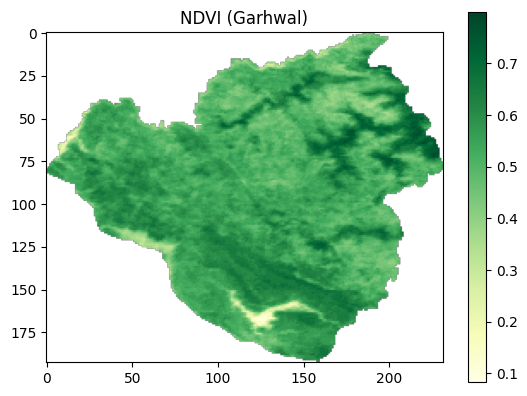

In [18]:
plt.imshow(ndvi, cmap='YlGn')
plt.title('NDVI (Garhwal)')
plt.colorbar()
plt.show()

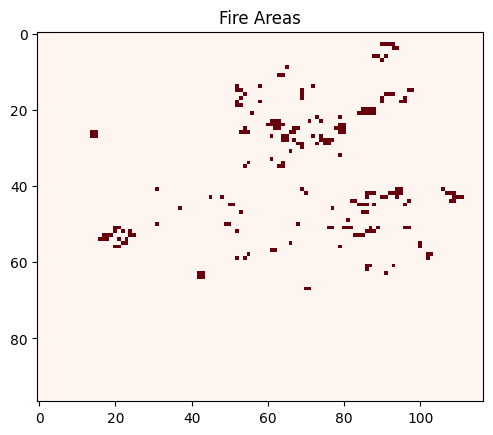

In [19]:
# Consider fire if mask >= 6 (moderate to high confidence)
binary_fire_mask = (fire_mask >= 6).astype(np.uint8)

plt.imshow(binary_fire_mask, cmap='Reds')
plt.title('Fire Areas')
plt.show()

In [26]:
# Check actual shapes
print("NDVI:", ndvi.shape)
print("Temperature:", temperature.shape)
print("NIR:", nir.shape)
print("Red:", red.shape)

# Get minimum height and width
min_h = min(ndvi.shape[0], temperature.shape[0], nir.shape[0], red.shape[0])
min_w = min(ndvi.shape[1], temperature.shape[1], nir.shape[1], red.shape[1])

# Crop all arrays to the smallest shape
ndvi_cropped = ndvi[:min_h, :min_w]
temperature_cropped = temperature[:min_h, :min_w]
nir_cropped = nir[:min_h, :min_w]
red_cropped = red[:min_h, :min_w]
binary_fire_mask_cropped = binary_fire_mask[:min_h, :min_w]

# Now stack safely
input_stack = np.stack([ndvi_cropped, temperature_cropped, nir_cropped], axis=-1)
print("✅ Final input tensor shape:", input_stack.shape)

np.save('/content/drive/MyDrive/ISRO_ForestFire/data/processed/X_garhwal.npy', input_stack)
np.save('/content/drive/MyDrive/ISRO_ForestFire/data/processed/Y_garhwal.npy', binary_fire_mask)

!git clone https://github.com/Coder-Kartikey/ISRO-ForestFire-BAH2025.git
%cd ISRO-ForestFire-BAH2025
!mkdir -p data/processed

# Copy from Colab working dir
!cp /content/drive/MyDrive/ISRO_ForestFire/data/processed/*.npy data/processed/

!git config --global user.email "pkartikey5757@gmail.com"
!git config --global user.name "Coder-Kartikey"

!git add data/processed/*
!git commit -m "Added preprocessed data files"
!git push origin main

NDVI: (193, 232)
Temperature: (97, 117)
NIR: (193, 232)
Red: (193, 232)
✅ Final input tensor shape: (97, 117, 3)
Cloning into 'ISRO-ForestFire-BAH2025'...
remote: Enumerating objects: 10, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 10 (delta 1), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (10/10), done.
Resolving deltas: 100% (1/1), done.
/content/ISRO-ForestFire-BAH2025/ISRO-ForestFire-BAH2025/ISRO-ForestFire-BAH2025/ISRO-ForestFire-BAH2025
[main 50a1345] Added preprocessed data files
 2 files changed, 0 insertions(+), 0 deletions(-)
 create mode 100644 data/processed/X_garhwal.npy
 create mode 100644 data/processed/Y_garhwal.npy
fatal: could not read Username for 'https://github.com': No such device or address
